In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
df=pd.read_csv("segmentation data.csv")

In [136]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [137]:
df.shape

(2000, 8)

In [138]:
df.isnull().sum()

,0
ID,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [139]:
df.drop('ID',axis=1,inplace=True)

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=scaler.fit_transform(df)

# Using K-Means

In [141]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): # Test k from 1 to 10
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

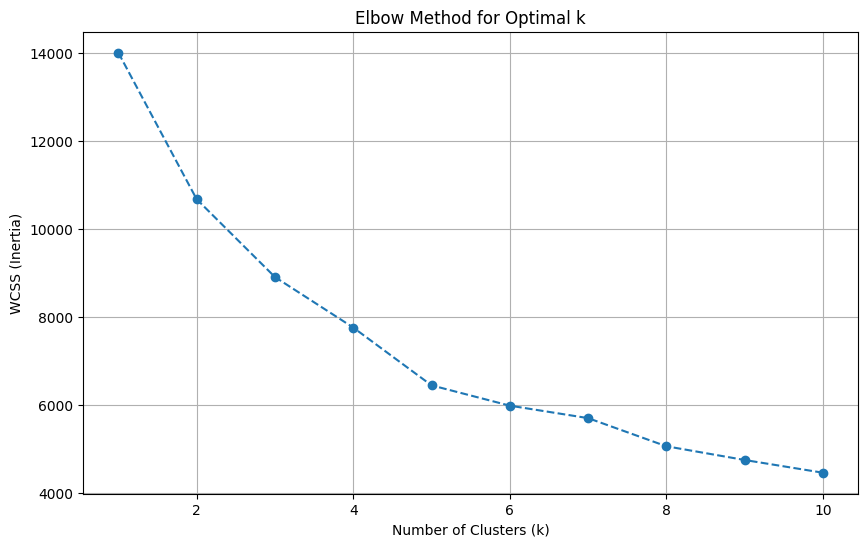

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

## from the elbow graph we see that the best number of K is around 6

In [143]:
k=6
kmeans=KMeans(n_clusters=6)
y_pred=kmeans.fit_predict(df)

In [144]:
# Convert the NumPy array back to a pandas DataFrame
df = pd.DataFrame(df)
df['Clusters']=y_pred

In [145]:
df.head(10)

,0,1,2,3,4,5,6,Clusters
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,3
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,2
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,2
5,-0.917399,-0.993024,-0.077583,-0.063372,0.627140,-1.269525,-0.909730,1
6,-0.917399,-0.993024,1.458716,-0.063372,0.932841,0.296823,0.321298,2
7,-0.917399,-0.993024,-0.077583,-0.063372,1.907295,1.863171,0.321298,2
8,-0.917399,1.007025,2.141515,1.604323,0.804125,-1.269525,-0.909730,3
9,-0.917399,1.007025,-0.675033,-0.063372,1.409254,1.863171,-0.909730,0


In [146]:
cluster_summary = df.groupby('Clusters').mean(numeric_only=True)
print(cluster_summary)


                 0         1         2         3         4         5         6
Clusters                                                                      
0         0.392297  0.978534 -0.668710 -0.049119  0.130895  0.497637  0.710598
1        -0.632944 -0.944440  0.670525  0.220203 -0.398027 -0.762206 -0.800083
2        -0.908516 -0.993024  0.090851 -0.594674  0.576698  0.712668  0.977665
3         0.064594  0.452899  1.660082  1.842565  1.144507  0.676544  0.609071
4         0.780876  1.007025 -0.458417  0.126618 -0.608714 -0.628446 -0.904535
5         0.180546 -0.993024 -0.563903 -1.036762 -0.751631 -0.681346 -0.839385


### from the above distribution we can say that:
#### first cluster is female, married, young, with low education, low income, no income, and settlement size of around 1
#### the same goes for other clusters, we just go with the same sequence

# Applying Hierarachial (akeed miss spelled) with different K tuning methods

In [147]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [148]:
df = pd.read_csv("segmentation data.csv")

In [149]:
df=scaler.fit_transform(df)

In [150]:
linked = linkage(df, method='ward')

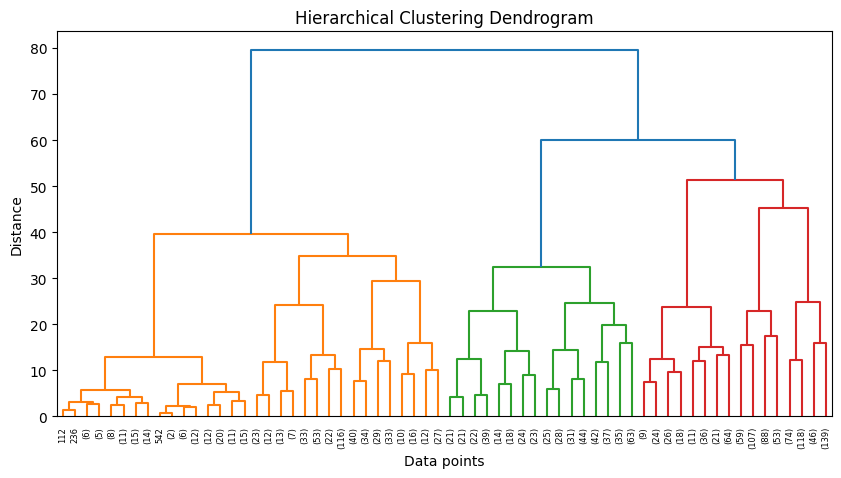

In [151]:
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [152]:
k=5
model = AgglomerativeClustering(n_clusters=k,linkage='ward')
y_pred=model.fit_predict(df)

In [153]:
df = pd.DataFrame(df)
df['Clusters']=y_pred

In [154]:
df.head(10)

,0,1,2,3,4,5,6,7,Clusters
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,4
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,0
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,0
5,-1.722525,-0.917399,-0.993024,-0.077583,-0.063372,0.627140,-1.269525,-0.909730,2
6,-1.720793,-0.917399,-0.993024,1.458716,-0.063372,0.932841,0.296823,0.321298,0
7,-1.719061,-0.917399,-0.993024,-0.077583,-0.063372,1.907295,1.863171,0.321298,0
8,-1.717329,-0.917399,1.007025,2.141515,1.604323,0.804125,-1.269525,-0.909730,3
9,-1.715597,-0.917399,1.007025,-0.675033,-0.063372,1.409254,1.863171,-0.909730,4


#### here the clusters are different than ones got using Kmeans, for example, here Cluster 4 is female unmarried young with high eduaction mid income occupation of around 1 and settlement size of aournd 2

##Using different Ks

In [155]:
df.columns=df.columns.astype(str)
k=6
model = AgglomerativeClustering(n_clusters=k,linkage='ward')
y_pred=model.fit_predict(df)

In [156]:
df = pd.DataFrame(df)
df['Clusters']=y_pred

In [157]:
df.head(10)

,0,1,2,3,4,5,6,7,Clusters
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,4
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,0
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,0
5,-1.722525,-0.917399,-0.993024,-0.077583,-0.063372,0.627140,-1.269525,-0.909730,2
6,-1.720793,-0.917399,-0.993024,1.458716,-0.063372,0.932841,0.296823,0.321298,0
7,-1.719061,-0.917399,-0.993024,-0.077583,-0.063372,1.907295,1.863171,0.321298,0
8,-1.717329,-0.917399,1.007025,2.141515,1.604323,0.804125,-1.269525,-0.909730,3
9,-1.715597,-0.917399,1.007025,-0.675033,-0.063372,1.409254,1.863171,-0.909730,4


In [158]:
df.columns=df.columns.astype(str)
k=3
model = AgglomerativeClustering(n_clusters=k,linkage='ward')
y_pred=model.fit_predict(df)

In [159]:
df = pd.DataFrame(df)
df['Clusters']=y_pred

In [160]:
df.head(10)

,0,1,2,3,4,5,6,7,Clusters
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,1
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,0
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,1
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,1
5,-1.722525,-0.917399,-0.993024,-0.077583,-0.063372,0.627140,-1.269525,-0.909730,2
6,-1.720793,-0.917399,-0.993024,1.458716,-0.063372,0.932841,0.296823,0.321298,1
7,-1.719061,-0.917399,-0.993024,-0.077583,-0.063372,1.907295,1.863171,0.321298,1
8,-1.717329,-0.917399,1.007025,2.141515,1.604323,0.804125,-1.269525,-0.909730,0
9,-1.715597,-0.917399,1.007025,-0.675033,-0.063372,1.409254,1.863171,-0.909730,0


# Using Clustering for preprocessing

In [161]:
from sklearn.datasets import load_digits
x_digits, y_digits = load_digits(return_X_y=True)

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits)

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
accuracy_score(y_pred,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9688888888888889

#### here we see accuracy of 96%
#### now using clustering and then measuring accuracy

In [164]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('kmeans',KMeans(n_clusters=63)),
    ('log',LogisticRegression())
])
pipeline.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=63)),
                ('log', LogisticRegression())])

In [165]:
y_pred=pipeline.predict(x_test)
accuracy_score(y_pred,y_test)

0.9755555555555555

#### Now the accuracy is higher 97.5%